In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns

In [3]:
os.chdir('D:/DataSet/PRD')
pr = pd.read_csv('total_amt.csv')
pr['report_date'] = pd.to_datetime(pr['report_date'],
                                        format='%Y-%m-%d')
pr = pr.set_index('report_date')
pr2 = pr.loc['2014-04':,:].copy()

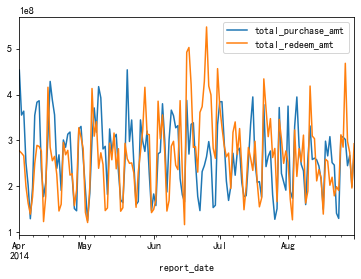

In [4]:
pr2.plot()

In [1]:
import statsmodels.api as sm

In [6]:
diff_p = pr2['total_purchase_amt'].diff(7).dropna()
sm.tsa.kpss(diff_p,nlags='auto')[1]

d:\softwares\python\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


0.1

In [8]:
adfp = sm.tsa.adfuller(diff_p)[1]
adfp

7.347640690733148e-09

In [10]:
diff_r = pr2['total_redeem_amt'].diff(7).dropna()

In [11]:
adfr = sm.tsa.adfuller(diff_r)[1]
kpssr = sm.tsa.kpss(diff_r,nlags='auto')[1]
adfr, kpssr

d:\softwares\python\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.00010511654667619596, 0.1)

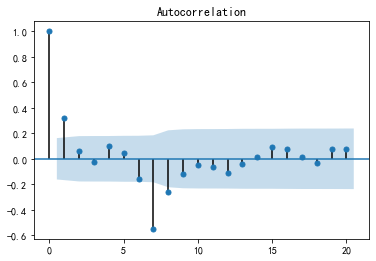

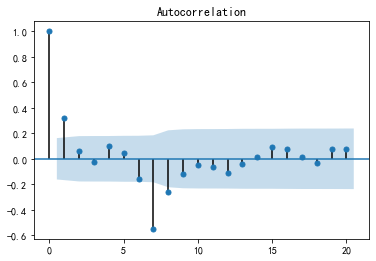

In [18]:
sm.tsa.graphics.plot_acf(diff_p,
                         lags=20)

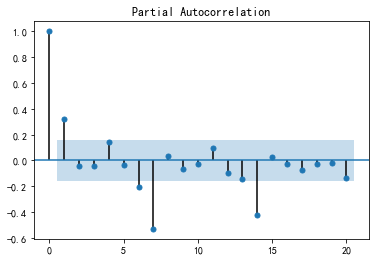

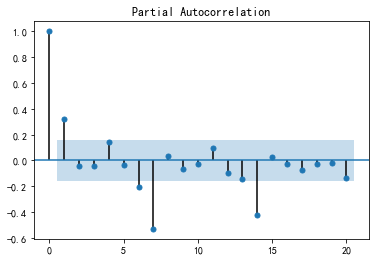

In [14]:
sm.tsa.graphics.plot_pacf(diff_p,lags=20)

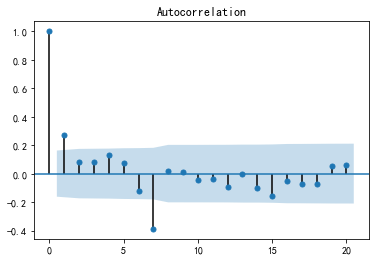

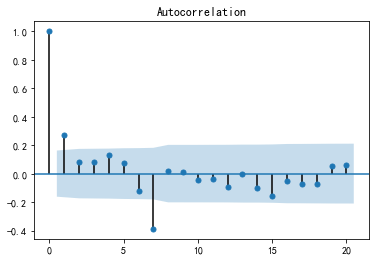

In [15]:
sm.tsa.graphics.plot_acf(diff_r,lags=20)

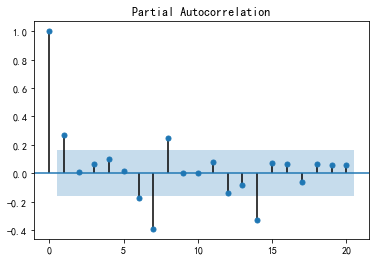

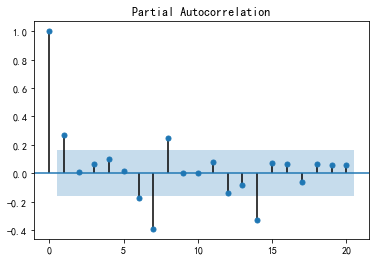

In [16]:
sm.tsa.graphics.plot_pacf(diff_r,lags=20)

d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


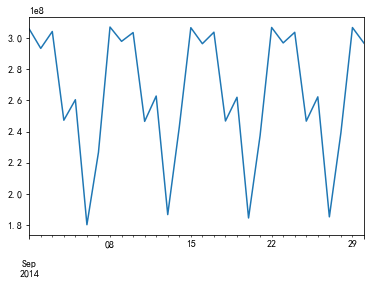

In [31]:
res = sm.tsa.arima.ARIMA(pr2['total_purchase_amt'],
                         seasonal_order=(1,1,0,7)).fit()
pred = res.forecast(steps=30)
pred.plot()

d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
d:\softwares\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


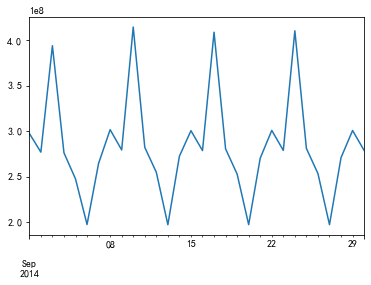

In [32]:
res1 = sm.tsa.arima.ARIMA(pr2['total_redeem_amt'],
                         seasonal_order=(1,1,0,7)).fit()
pred1 = res1.forecast(30)
pred1.plot()

In [33]:
def to_result(purchase, redeem):
    report_date=list(range(20140901,20140931))
    sub=pd.DataFrame()
    sub['purchase']=purchase
    sub['redeem']=redeem
    sub=sub.reset_index()
    sub['index']=report_date
    sub=sub.rename(columns={'index':'report_date'})
    sub[['purchase','redeem']]=sub[['purchase','redeem']].astype(np.int64)
    sub=sub.set_index(['report_date'])
    sub.to_csv('tc_comp_predict_table.csv',sep=',')
    
to_result(pred, pred1)